# Iterační metody lineární algebry

V této kapitole si ukážeme několik iterativních metod pro řešení úloh z lineární algebry, konkrétně opět řešení soustavy lineárních rovnic a hledání vlastních čísel.

In [483]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Iterační metody pro řešení soustavy lineárních rovnic

V této části budeme pokračovat s řešením úlohy:

$$
\mathbb{A} \vec{x} = \vec{b}.
$$

Iterační metody, nebo jinak *relaxační metody*, hledají řešení jiným způsobem než metody přímé. Fungují na principu postupného zlepšování výsledku podle iteračního vzorce. V jakých případech se vyplatí použít iteračích metod?

Typickým příkladem je soustava, kde počítat inverzi je výpočetně náročné a řešení lze získat rychleji. Například pro soustavy s řídkou, ale velkou maticí, *Gaussova eliminace* trvá řádově $O(N^3)$. Oproti tomu, jak uvidíme, jeden krok iteračních metod je pouze $O(N^2)$! Pokud tedy bude stačit méně iterací než $N$, je velmi výhodné takovou metodu použít.

Iterační metody můžou být výhodné dále v situaci, kdy máme přibližnou představu, jak řešení vypadá, a stačí se k přesnému řešení pouze přiblížit.

Naopak nevýhodou těchto metod je omezení, na které matice je lze použít. Přesto jsou tyto metody velmi užitečné, jelikož existuje řada úloh, kde tyto omezení nevadí. V kontextu iteračních metod nás zajímají následující typy matic:

* **Diagonálně dominantní matice** - Matice $\mathbb{A}$ je *diagonálně dominantní*, pokud:

$$
|a_{ii}| > \sum_{j \neq i}^{n}|a_{ij}|, \quad \forall i = 1, 2, \dots, n.
$$

* **Pozitivně definitní matice** - Čtvercová matice je *pozitivně definitní*, pokud:

$$
(\vec{x}, \mathbb{A} \vec{x}) > 0, \quad \forall \vec{x} \neq \vec{0}.
$$

Symetrická matice je pozitivně definitní právě tehdy, když má všechna *vlastní čísla* kladná.

Diagonálně dominantní matice vznikají například při konstrukci schémat (numerických metod) na řešení parciálních diferenciálních rovnic (viz [poslední kapitola](pdr)).

**Shrnutí**
* Výhody:
    - postupné zpřesnění odhadu
    - rychlejší pro velké (a řídké) matice, při rychlé konvergenci iterační metody
    - nedochází k tak silnému kumulovaní chyb, jako u přímých metod!
* Nevýhody:
    - lze použít jen na úzkou třídu matic, ne obecně jako Gaussova eliminační metoda

**Iterační proces obecně**

Na začátku máme určitý odhad $\vec{x}_0$ řešení soustavy lineárních rovnic $\mathbb{A} \vec{x} = \vec{b}$. Ten buď známe díky nějaké externí informaci, nebo prostě zvolíme náhodný vektor.
U těchto metod se chceme vyhnout přímému výpočtu inverze $\mathbb{A}^{-1}$, násobení *čtvercových* matic a jiným operacím, které jsou pomalé (složitosti $O(N^3)$). Jeden krok přiblížení k přesnému řešení je obecného tvaru:

$$
\vec{x}^{(k+1)} = \mathbb{B}_k \vec{x}^{(k)} + \vec{c}_k.
$$

Matice $\mathbb{B}_k$ musí splňovat:

$$
\vec{x} = \mathbb{B}_k \vec{x} + \vec{c}_k,
$$

kde $\vec{x}$ je řešení soustavy. Tedy $\vec{x}$ musí být **pevným bodem** této rekurentní funkce.

Pro konvergenci je tedy nutné a stačí, aby:

$$
\lim_{k\to\infty} \mathbb{B}_k \mathbb{B}_{k-1} \dots \mathbb{B}_0 = 0.
$$

Dělení metod:
* **stacionární** - matice $\mathbb{B}_k = \mathbb{B}$ je *konstantní*, stejná v každé iteraci
* **nestacionární** - matice $\mathbb{B}_k$ nejsou *konstantní*, volí se pro každou iteraci zvlášť

Dále si ukážeme pouze metody *stacionární*, které jsou výrazně jednodušší v praxi implementovat na počítači.

Co musí splňovat matice $\mathbb{B}$, aby metoda konvergovala?
* Pro všechna vlastní čísla matice $\mathbb{B}$ musí platit: $|\lambda_i| < 1$.
* Pokud v některé maticové normě platí $\Vert\mathbb{B}\Vert < 1$, pak iterace konvergují.

**Odhad chyby**

Abychom věděli, kdy metodu zastavit, potřebujeme znát odhad chyby, tedy jak blízko jsme přesné hodnotě. Budeme chtít iterovat, dokud nebude platit:

$$
\Vert \vec{x}^{(k)} - \vec{x} \Vert \leq \varepsilon,
$$

což lze odhadnout pomocí:

$$
\Vert \vec{x}^{(k)} - \vec{x} \Vert = \Vert \vec{x}^{(k)} - \mathbb{A}^{-1} \vec{b} \Vert = \Vert \mathbb{A}^{-1} ( \mathbb{A} \vec{x}^{(k)} - \vec{b}) \Vert \leq \Vert \mathbb{A}^{-1} \Vert \Vert\mathbb{A} \vec{x}^{(k)} - \vec{b}\Vert.
$$

### Prostá iterace

Jednoduchý způsob, jak získat iterační vztah je převedení soustavy $\mathbb{A} \vec{x} = \vec{b}$ na tvar:

$$
\vec{x} = (\mathbb{I} - \mathbb{A}) \vec{x} + \vec{b},
$$

kde $\mathbb{I}$ je jednotková (identitní) matice. Tím máme splňenou *podmínku pevného bodu*. **Prostá iterace** je tedy dána vztahem:

$$
\vec{x}^{(k+1)} = (\mathbb{I} - \mathbb{A}) \vec{x}^{(k)} + \vec{b},
$$

kde $\mathbb{B} = \mathbb{I} - \mathbb{A}$. V praxi se tato metoda nepoužívá, jelikož konverguje velmi pomalu a lze ji použít pro velmi úzkou třídu matic ($\Vert \mathbb{I} - \mathbb{A} \Vert < 1$).

### Jacobiho metoda

V následujících třech iteračních metodách je postup velmi podobný, založený na následujícím rozdělení matice:

$$
\mathbb{A} = \mathbb{L} + \mathbb{D} + \mathbb{R},
$$

kde $\mathbb{L}$ je *dolní trojúhelníková*, $\mathbb{D}$ diagonální a $\mathbb{R}$ je *horní trojúhelníková* matice.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #F4330C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #F7C8C0; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Pozor</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Matice $\mathbb{L}$ a $\mathbb{R}$ jsou odlišné od matic LU rozkladu! Zde tyto matice mají nulovou diagonálu a vznikají rozkladem matice $\mathbb{A}$ na součet matic, ne součin. Tedy sdílejí s maticí $\mathbb{A}$ stejné prvky.
</p>
</div>
</div>

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Doplňte tělo funkce `ldr(A)`, která rozděluje matici `A` na matice $\mathbb{L}$, $\mathbb{D}$ a $\mathbb{R}$.
</p>
</div>
</div>

In [ ]:
def ldr(A):
    ## DOPLŇTE ##
    L = np.zeros(A.shape)
    D = np.zeros(A.shape)
    R = np.zeros(A.shape)
    for i in range(A.shape[0]):
        D[i,i] = A[i,i]
        L[i,:i] = A[i,:i]
        R[i,i+1:] = A[i,i+1:]
    return L, D, R

A = np.random.rand(4,4)
print(A)
L, D, R = ldr(A)
print(L)
print(D)
print(R)

[[0.42995575 0.51992112 0.65672658 0.94510969]
 [0.69868096 0.83906811 0.97430114 0.41008361]
 [0.98980133 0.86927252 0.43881204 0.1000334 ]
 [0.66134786 0.53014438 0.75842952 0.1245576 ]]
[[0.         0.         0.         0.        ]
 [0.69868096 0.         0.         0.        ]
 [0.98980133 0.86927252 0.         0.        ]
 [0.66134786 0.53014438 0.75842952 0.        ]]
[[0.42995575 0.         0.         0.        ]
 [0.         0.83906811 0.         0.        ]
 [0.         0.         0.43881204 0.        ]
 [0.         0.         0.         0.1245576 ]]
[[0.         0.51992112 0.65672658 0.94510969]
 [0.         0.         0.97430114 0.41008361]
 [0.         0.         0.         0.1000334 ]
 [0.         0.         0.         0.        ]]


Pro získání kroku Jacobiho metody nahradíme matici $\mathbb{A}$ jejím rozkladem:

$$
\begin{align}
\mathbb{A} \vec{x} = (\mathbb{L} + \mathbb{D} + \mathbb{R}) \vec{x} = \vec{b}, \\
\mathbb{D} \vec{x} = \vec{b} - (\mathbb{L} + \mathbb{R}) \vec{x}, \\
\vec{x} = \mathbb{D}^{-1} \vec{b} - \mathbb{D}^{-1}(\mathbb{L} + \mathbb{R}) \vec{x}.
\end{align}
$$

Jedna iterace je tedy dána vztahem:

$$
\vec{x}^{(k+1)} = -\mathbb{D}^{-1}(\mathbb{L} + \mathbb{R}) \vec{x}^{(k)} + \mathbb{D}^{-1} \vec{b},
$$

kde $\mathbb{B} = -\mathbb{D}^{-1}(\mathbb{L} + \mathbb{R})$.

Po složkách:

![Jacobi po složkách](../images/jacobi.png)

Lze ukazát, že Jacobiho metoda konverguje pro *diagonálně domimantní matice*.


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte iterační Jacobiho metodu a ověřte pomocí knihovní funkce [`scipy.linalg.solve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html). Parametr `n` je zvolený počet kroků metody.


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Pro násobění matic nebo matic a vektoru použijte funkci `np.dot()` nebo operátoru `@`.
</p>
</div>
</div>
</p>
</div>
</div>

In [ ]:
def jacobi(A, x0, b, n):
    ## DOPLŇTE ##
    x = x0
    L, D, R = ldr(A)
    Dinv = np.diag(1 / D.diagonal())
    for i in range(n):
        x = - Dinv @ (L + R) @ x + Dinv @ b 
    return x

m = 4
A = np.random.rand(m,m) + m*np.eye(m) # diagonalne dominantni matice
b = np.random.rand(m)
x0 = np.random.rand(m)
x = jacobi(A,x0,b,n=10)
print(x, la.solve(A,b))
print(la.norm(x - la.solve(A,b)), )

[0.01495909 0.12346898 0.10865718 0.13908484] [0.01495838 0.12346865 0.10865656 0.13908399]
1.3120271746104454e-06


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

V každé iteraci sice dochází k násobení čtvercových matic, ale jelikož jsou speciálního tvaru (diagonální a trojúhelníková), lze násobení provést výrazně rychleji!
</p>
</div>
</div>

### Gauss-Seidelova metoda

Gauss-Seidelova metoda je velmi podobná Jacobiho metodě. Opět nahradíme matici $\mathbb{A}$ jejím rozkladem, akorát prohodíme pořadí matic:

$$
\begin{align}
\mathbb{A} \vec{x} = (\mathbb{L} + \mathbb{D} + \mathbb{R}) \vec{x} = \vec{b}, \\
(\mathbb{L} + \mathbb{D}) \vec{x} = \vec{b} - \mathbb{R} \vec{x}, \\
\vec{x} = (\mathbb{L} + \mathbb{D})^{-1} \vec{b} - (\mathbb{L} + \mathbb{D})^{-1} \mathbb{R} \vec{x}.
\end{align}
$$

Jedna iterace je tedy dána vztahem:

$$
\vec{x}^{(k+1)} = -(\mathbb{L} + \mathbb{D})^{-1} \mathbb{R} \vec{x}^{(k)} + (\mathbb{L} + \mathbb{D})^{-1} \vec{b},
$$

kde $\mathbb{B} = -(\mathbb{L} + \mathbb{D})^{-1} \mathbb{R}$.

Po složkách:

![Gauss-Seidel po složkách](../images/gauss_seidel.png)

Výhoda této úpravy je v tom, že v každé iteraci, pro výpočet $j$-té složky řešení využíváme znalosti již napočítaných (aktualizovaných) složek vektoru $\vec{x}$. To vede k rychlejší konvergenci. Tato metoda je navíc konvergentní pro *symetrické pozitivně definitní matice*.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte iterační Gauss-Seidelovu metodu a ověřte pomocí knihovní funkce [`scipy.linalg.solve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html). Potřebujeme se vyhnout přímému výpočtu $(\mathbb{L} + \mathbb{D})^{-1}$. Jaký postup z minulé kapitoly můžeme použít? Parametr `n` je zvolený počet kroků metody.
</p>
</div>
</div>

In [ ]:
def dopredna_substituce(A, b):
    x = np.zeros(A.shape[0])
    for i in range(0,A.shape[0]):
        x[i] = b[i] / A[i,i]
        for j in range(0,i):
            x[i] -= A[i,j]*x[j] / A[i,i]
    return x

def gauss_seidel(A, x0, b, n):
    ## DOPLŇTE ##
    return x

m = 4
A = np.random.rand(m,m) + m*np.eye(m) # diagonalne dominantni matice
b = np.random.rand(m)
x0 = np.random.rand(m)
x = gauss_seidel(A,x0,b,n=10)
print(x, la.solve(A,b))

[0.1168297  0.06504984 0.11969983 0.05548822] [0.1168297  0.06504984 0.11969983 0.05548822]


### Superrelaxační metoda

Gauss-Seidelova metoda konverguje již pro širší třídu matic, ale konvergence může stále být v některých případech pomalá. Konvergence je možné dále urychlit. *Superrelaxační metoda* je dána následovně:

$$
\vec{x}^{(k+1)} = \vec{x}^{(k)} + \omega \Delta \vec{x}^{(k)} = (1 - \omega) \vec{x}^{(k)} + \omega \vec{x}^{(k+1)}_{GS},
$$

kde $\Delta \vec{x}^{(k)} = \vec{x}^{(k+1)} - \vec{x}^{(k)}$ je rozdíl mezi dvěma kroky Gauss-Seidelovy metody ($\vec{x}^{(k+1)}_{GS}$ je výsledek  Gauss-Seidlovy metody v iteraci $k$).

Relaxační faktor $\omega$ lze volit z intervalu $(0, 2)$ (aby metoda konvergovala), obvykle se však v praxi volí $\omega \in [1,2)$. Tento faktor slouží k urychlení konvergence metody tím, že zvětší velikost kroku Gauss-Seidlovy metody. Lze ukázat, že optimální hodnota relaxačního faktoru má tvar:

$$
\omega_{opt} = \frac{2}{1 + \sqrt{1 - \rho(\mathbb{B})^2}},
$$

kde $\rho(\mathbb{B}) = \text{max}(|\lambda_1|,|\lambda_2|,\dots,|\lambda_n|)$ je *spektrární poloměr* a $\mathbb{B} = -(\mathbb{L} + \mathbb{D})^{-1} \mathbb{R}$ je iterační matice Gauss-Seidelovy metody. Pro spektrární poloměr je potřeba znát pro danou úlohu alespoň přibližný analytický vzorec nebo ho odhadnout numericky.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte superrelaxační metodu s optimálním parametrem. Pro získání největšího vlastního čísla použijte `np.max(np.abs(np.linalg.eig(B)[0]))`. Inverzi matice $B$ spočítejte pomocí `scipy.linalg.inv(B)`. Parametr `n` je zvolený počet kroků metody.
</p>
</div>
</div>

In [487]:
A = np.random.rand(4,4)
print(np.max(np.abs(np.linalg.eig(A)[0])))

2.1168824824383954


In [ ]:
def super_relax(A, x0, b, n):
    ## DOPLŇTE ##
    return x

m = 10
A = np.random.rand(m,m) - m*np.eye(m) # diagonalne dominantni matice

b = np.random.rand(m)
x0 = np.random.rand(m) + m
x1 = gauss_seidel(A,x0,b,n=10)
x2 = super_relax(A,x0,b,n=10)
x = la.solve(A,b)
print(la.norm(x1 - x))
print(la.norm(x2 - x))
#print(x)

2.7934953915597212e-05
1.730040573089344e-05


### Srovnání konvergence iteračních metod


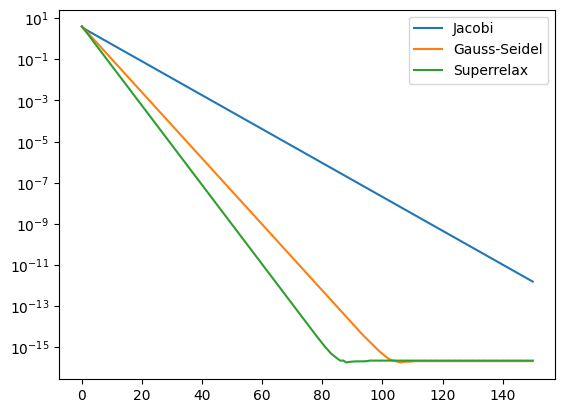

In [489]:
m = 40
q = -0.6 # pro -0.6
A = np.random.rand(m,m) + q*m*np.eye(m) # diagonalne dominantni matice

#A = np.random.rand(m, m) + m*np.eye(m)
#A = np.dot(A, A.transpose()) # nahodna symetricka pozitivne definitni matice

b = np.random.rand(m)
x0 = np.random.rand(m)
x = la.solve(A,b)

err_jacobi = [la.norm(x0 - x)]
err_gauss_seidel = [la.norm(x0 - x)]
err_super_relax = [la.norm(x0 - x)]

x_jacobi = x0
x_gauss_seidel = x0
x_super_relax = x0

N = 150
nn = np.arange(N)

for i in nn:
    x_jacobi = jacobi(A, x_jacobi, b, 1)
    x_gauss_seidel = gauss_seidel(A, x_gauss_seidel, b, 1)
    x_super_relax = super_relax(A, x_super_relax, b, 1)
    
    err_jacobi.append(la.norm(x_jacobi - x))
    err_gauss_seidel.append(la.norm(x_gauss_seidel - x))
    err_super_relax.append(la.norm(x_super_relax - x))
    
nn = np.append(nn, [N])
plt.plot(nn, err_jacobi, label='Jacobi')
plt.plot(nn, err_gauss_seidel, label='Gauss-Seidel')
plt.plot(nn, err_super_relax, label='Superrelax')
plt.yscale('log')
plt.legend();

## Hledání vlastních čísel matice


(cast_vl_cis)=
### Částečný problém vlastních čísel

Cílem této metody je nalézt pouze největší vlastní číslo v absolutní hodnotě (*spektrární poloměr*).
Metodu lze aplikovat na [diagonalizovatelné matice](https://cs.wikipedia.org/wiki/Diagonalizovateln%C3%A1_matice):

$$
\mathbb{A} = \mathbb{R} \mathbb{D} \mathbb{R}^{-1},
$$

kde $\mathbb{R}$ je regulární matice a $\mathbb{D}$ je diagonální matice, jejíž diagonální prvky odpovídají vlastním číslům. Sloupce matice $\mathbb{R}$ odpovídají vlastním vektorům.

Iterační metoda pro nalezení největšího vlastního čísla začíná z počátečního odhadu $\vec{v}_0$, který postupně zpřesňuje pomocí vztahu:

$$
\vec{v}_{k+1} = \frac{\mathbb{A} \vec{v}_k}{\Vert \mathbb{A} \vec{v}_k \Vert}.
$$

Tato metoda konverguje za následujících podmínek:

1. Matice $\mathbb{A}$ má jedno vlastní číslo výrazně větší v absolutní hodnotě než zbylá vlastní čísla.
2. Startující vektor $\vec{v}_0$ má nenulový příspěvek do směru vlastního vektoru odpovídajícímu největšímu vlastnímu číslu. Tedy $\vec{v}_{0} \cdot \vec{v} \neq 0$, kde $\mathbb{A}\vec{v} = \lambda \vec{v}$ a $\lambda = \max_i{|\lambda_i|}$.



## Ukázky z praxe

S řešením soustav lineáních rovnic se lze setkat téměř v každém technickém odvětví. Typicky dostáváme úlohu tohoto tvaru důsledkem několika vzájemných lineárních závislostí většího počtu veličin a čílem je nalézt průnik, tedy kdy jsou všechny rovnice splněny.

$$
\begin{align*}
    3x + 2y - z &= 1 \\
    2x - 2y + 4z &= -2 \\
    -x + 0.5y - z &= 0
\end{align*} 
$$

![linalg systém](../images/linalgsystem3.png)

V kvantové mechanice je naprosto zásadní znalost matic operátorů (v dáné bázi) a nalezení vlastních čísel, které například odpovídají energetickým hladinám kvantového systému.

V numerice se mnoho úloh redukuje na soustavu lineárních rovnic, jelikož jí dokážeme snadno řešit na počítači. Pro nás je nejrelevantnějším příkladem řešení úloh popsaných pomocí různých *diferenciálních rovnic* (viz [kapitola 11](pdr)).

## Zápočtová úloha

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol - zápočet 3</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

[ZDE](ukol3)
</p>
</div>
</div>